# compute popularities ( favs + rts )

In [1]:
from tw_dataset.dbmodels import *

Switching to API Credentials #7


In [2]:
s = open_session()

In [3]:
import pandas as pd

In [4]:
q = s.query(Tweet.id, Tweet.favorite_count, Tweet.retweet_count)

In [5]:
df = pd.DataFrame(q.all())

In [6]:
df.index = df.id; del df['id']

In [7]:
Xallpop=df

In [8]:
Xallpop.head()

,favorite_count,retweet_count
id,,
155040762,52,24
507816092,4679,7803
560295862,7,2
707791152,37,4
887228585,41,29


# pick a user

In [9]:
from experiments.datasets import *

In [10]:
uid = TEST_USERS_ALL[0][0]

# convert datasets fav/rt features

In [11]:
X_train, X_valid, X_test, y_train, y_valid, y_test = load_dataframe(uid)

In [12]:
def convert_to_popularity(X):
    tweet_ids = X.index
    Xpop = Xallpop.loc[tweet_ids]
    return Xpop

In [13]:
X_train_pop = convert_to_popularity(X_train)
X_valid_pop = convert_to_popularity(X_valid)
X_test_pop = convert_to_popularity(X_test)

# visualize training data

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [15]:
colors = ['g' if y else 'r' for y in y_train]

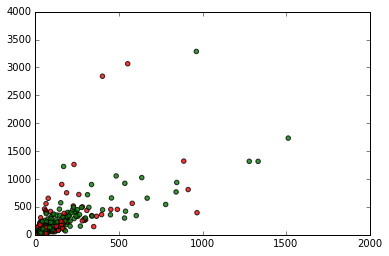

In [16]:
plt.scatter(X_train_pop.favorite_count, X_train_pop.retweet_count, marker = 'o', c =colors, alpha=0.8)
plt.xlim(0, 2000)
plt.ylim(0,4000)
plt.show()

# fit a LogisticRegression model

Elijo un clasificador lineal porque esto equivale a definir popularidad como una combinación lineal de favs y rts y predecir poniéndole un umbral a la popularidad.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clfpop = LogisticRegression(class_weight='balanced')

In [19]:
clfpop.fit(X_train_pop, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# evaluate

In [21]:
from experiments._1_one_user_learn_neighbours.try_some_users import evaluate_model

In [22]:
evaluate_model(clfpop, X_train_pop, X_valid_pop, y_train, y_valid)

Detailed classification report:

Scores on training set.

             precision    recall  f1-score   support

        0.0       0.58      0.92      0.71      1902
        1.0       0.68      0.20      0.31      1598

avg / total       0.63      0.59      0.53      3500

Scores on test set.

             precision    recall  f1-score   support

        0.0       0.54      0.91      0.68       251
        1.0       0.71      0.22      0.33       249

avg / total       0.62      0.57      0.51       500



# compare to social model

In [28]:
from experiments._1_one_user_learn_neighbours.try_some_users import load_model_small

In [29]:
clfsoc = load_model_small(uid, 'svc')

In [30]:
evaluate_model(clfsoc, X_train, X_valid, y_train, y_valid)

Detailed classification report:

Scores on training set.

             precision    recall  f1-score   support

        0.0       0.86      0.97      0.91      1902
        1.0       0.96      0.81      0.88      1598

avg / total       0.91      0.90      0.90      3500

Scores on test set.

             precision    recall  f1-score   support

        0.0       0.85      0.97      0.91       251
        1.0       0.97      0.83      0.89       249

avg / total       0.91      0.90      0.90       500



# do for all users

( see `fit_baseline_models.py` )